In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enter the password here


In [2]:
password = "3me7vdo_"

In [3]:
from npz_loader import load_encrypted_npz

data = load_encrypted_npz(password)

In [4]:
print("Decrypted data:", data)


Decrypted data: {'X_train': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'y_train': array([1, 2, 1, ..., 2, 2, 1], dtype=uint8), 'X_test': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


# Now start working


# <u>Name :</u> RAZAFIMANANSTOA 
# <u> Firstname :</u> Lucas Mirija

# ___________________________________________________

## Defining Classes


In [5]:
class DataSplitter:
    def __init__(self, train_ratio=0.8):
        """ 
        Shuffling the dataframe then split it into two samples:
        - train sample
        - validation sample
        """
        self.train_ratio = train_ratio

    def split(self, df):
        rows = df.values.tolist()
        np.random.shuffle(rows)
        train_size = int(len(rows) * self.train_ratio)
        train_rows = rows[:train_size]
        valid_rows = rows[train_size:]
        
        train = pd.DataFrame(train_rows, columns=df.columns)
        valid = pd.DataFrame(valid_rows, columns=df.columns)
        
        return train, valid

class Scaler:
    def __init__(self):
        """
        Scaling the features Matrix using NumPy mean and std
        """
        self.mean = None
        self.deviation = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.deviation = np.std(X, axis=0, ddof=1)

    def fit_transform(self, X):
        self.fit(X)
        epsilon = 1e-10
        return (X - self.mean) / (self.deviation+epsilon)
scaler = Scaler()

class BinaryClassifier : 
    def __init__ (self, learning_rate = 0.01 , iterations = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None

    
    def fit (self , X , y):
        """Logistic regression classifier using Batch Gradient descent

        Param:
            X (np array): features matrix (m x n)
            y (np array): target vector (m x 1)
        """
        m,n = X.shape
        X = scaler.fit_transform(X)
        self.w = np.zeros((n,1))
        self.b = 0
        y= y.reshape(-1,1)
        epsilon = 1e-10
        cost_list = []

        for i in range (self.iterations):
            z = np.dot(X,self.w) + self.b
            A = 1/(1+np.exp(-z))
            cost = -(1/m)*np.sum( y*np.log(A + epsilon) + (1-y)*np.log(1-A + epsilon))
            dW = (1/m)*np.dot(X.T , A -y)
            dB = (1/m)*np.sum(A - y)
            self.w -= self.learning_rate *dW
            self.b -= self.learning_rate *dB
            cost_list.append(cost)
        plt.plot(np.arange(self.iterations),cost_list)
        plt.xlabel('iterations')
        plt.ylabel('cost value')
        plt.title('COST FUNCTION OVER ITERATIONS')
        plt.show()


    def predict (self,X):
        X = scaler.fit_transform(X)
        z = np.dot (X,self.w)+self.b
        A = 1/(1+np.exp(-z))
        return np.array ((A > 0.5).astype(int)) + 1 # +1 to get 1s and 2s


class Score:
    """
    Calculating the model's score (F1) ; y=2 is considered as Positive
    """
    def __init__(self, y_true, y_pred):
        self.y_true = np.array(y_true)
        self.y_pred = np.array(y_pred)

    def true_positives(self):
        return np.sum((self.y_true == 2) & (self.y_pred == 2))

    def false_positives(self):
        return np.sum((self.y_true == 1) & (self.y_pred == 2))

    def false_negatives(self):
        return np.sum((self.y_true == 2) & (self.y_pred == 1))

    def precision(self):
        true_pos = self.true_positives()
        false_pos = self.false_positives()
        return true_pos / (true_pos + false_pos)

    def recall(self):
        true_pos = self.true_positives()
        false_neg = self.false_negatives()
        return true_pos / (true_pos + false_neg) 

    def f1_score(self):
        prec = self.precision()
        rec = self.recall()
        return 2 * (prec * rec) / (prec + rec)


### Reshaping dataframe with pandas for easier manipulation and visualization:

In [6]:
n = len (data['X_train'][0]);
df = pd.DataFrame(data['X_train'], columns=[f'feature_{i+1}' for i in range (n)])
df['y']=data['y_train']
X_test = pd.DataFrame (data['X_test'], columns = [f'feature_{i+1}' for i in range (n)])
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Splitting df : Training (80 % ), Validation (20 %)

In [7]:
splitter = DataSplitter(train_ratio=0.8)
train, valid = splitter.split(df)

#### Replacing the targets with 0 and 1 for Logistic Regression (for train only): 

In [8]:
train["y"] = train["y"] -1

#### Extracting Xs and ys from the df

In [9]:
def get_xy (df,target : str):
    X = df [[c for c in df.columns if c != target]].values
    y = df[target].values.reshape(-1,1)
    return X, y

target = "y"
X_train, y_train = get_xy (train,target)
X_valid, y_valid = get_xy (valid,target)

### Training the model and keeping track of the cost function :

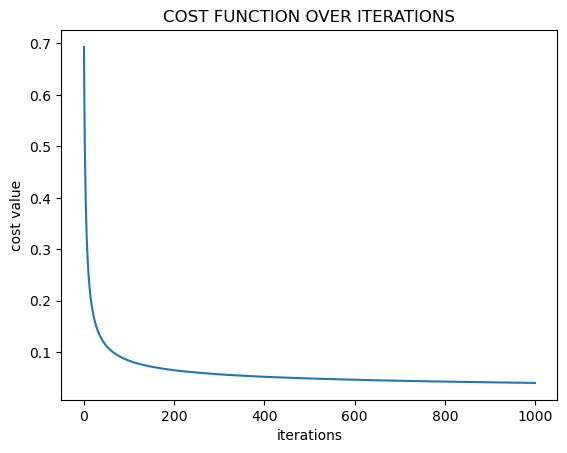

In [10]:
model = BinaryClassifier()
model.fit(X_train,y_train)

### Predict y for X_valid :

In [11]:
y_pred_valid = model.predict(X_valid)
print(y_pred_valid)

[[1]
 [1]
 [2]
 ...
 [1]
 [2]
 [1]]


### Calculating the model's score for the Validation sample

In [12]:
model_score = Score(y_valid  ,y_pred_valid)
score = model_score.f1_score()
print(f"F1 Score: {score}")

F1 Score: 0.9866777685262281


# ______________________________________________________

# Predictions for X_test

In [13]:
y_pred_test = model.predict (X_test)
print (y_pred_test)

[[2]
 [1]
 [1]
 ...
 [2]
 [1]
 [2]]
